# Problem Formulation

>**The problem:** 

 we need to predict if a specific reddit post is fake news or not, by looking at its title.

>**input:**

a tabular dataset which contains text posts from reddit with its labels (Fake/Not fake).

>**output:**

We are going to predict the label column to know if a specific reddit post is fake news or not.


>**Data Minning Function**

This is a binary classification task


>**The challanges could be**

Data cleaning, data preprocessing, dealing with missing data, model selection, model complexity, Not enough training data, Synonyms,  Nonrepresentative training data, data imbalance,Errors in text and speech.


> **The impact:**

Fake news on social media can have a negative impact on society. It can damage the democratic process, harm public safety, and cause mistrust among people. It can also lead to hatred against religion, politics, celebrities or agencies which can lead to riots. So we need to reduce the spreadness of fake news on social media.



> **The ideal solution**

is to select and design a NLP machine learning model that suits the data and understand the text that influence the classification task.

# Questions ❓



> 🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?

* A character n-gram is a set of co-occurring characters within a given window. It’s very similar to word n-grams, only that the window size is at the character level.Character n-grams are widely used in text categorization problems 
and are the single most successful type of feature in authorship attribution. Their primary advantage is language independence, as they can be applied to a new language with no additional effort.However, character n-grams may not be suitable for tasks that require semantic understanding of text. 
* On the other hand, word n-grams are more commonly used in natural language processing (NLP) tasks such as sentiment analysis and machine translation.

* Regarding the OOV issue, character n-grams tend to suffer less from this issue than word n-grams. This is because character n-grams can capture morphological information that is lost when words are tokenized. 

> 🌈 What is the difference between stop word removal and stemming? Are these techniques language-dependent?

* Stop word removal is the process of removing commonly used words such as “the”, “a”, “an”, “in”, etc.

* Stemming is the process of reducing a word to its root form by removing suffixes such as “-ing”, “-ed”, “-s”, etc. For example, “running” and “ran” would both be reduced to “run”.

*  Stop word removal is used to remove words that do not add much meaning to the text, while stemming is used to reduce words to their root form so that they can be more easily compared and analyzed

* Both techniques are language-dependent and require a list of stop words or a stemmer algorithm specific to each language.

> 🌈 Is tokenization techniques language dependent? Why?

* Tokenization techniques are not language-dependent because they are based on general rules such as whitespace, punctuation marks, etc., which are common across languages

> 🌈 What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

* The main difference between CountVectorizer and TfidfVectorizer is that CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach)

* while TfidfVectorizer not only focuses on the frequency of words present in the corpus but also provides the importance of the words by assigning a score to each word. The score is calculated by multiplying the `term frequency` (TF) with `inverse document frequency` (IDF) which is calculated as log(N/df) where N is the total number of documents and df is the number of documents containing a particular word.

* It is not feasible to use all possible n-grams because the number of possible n-grams grows exponentially with the size of the text corpus and the order of the n-grams. This can result in a very large number of features, which can make it difficult to train machine learning models and can lead to overfitting. Instead, it is common to use a subset of n-grams that are most relevant to the task at hand.

* There are several ways to select n-grams for use in natural language processing tasks. 

1.    One way is to use statistical measuressuch as term frequency-inverse document frequency (tf-idf) to determine the relevance of n-grams
2.   Another approach is to use machine learning algorithms to automatically identify the most informative n-grams for a given task

3.  Cross-validation can also be used to estimate the best length of n-grams



# Implementation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import holoviews as hv
import nltk 
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()

from pathlib import Path

# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [5]:
# reading data
train = pd.read_csv("/content/gdrive/MyDrive/competition 3/xy_train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/competition 3/x_test.csv") 

In [6]:
train.shape

(60000, 3)

In [7]:
train

,id,text,label
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...,...
59995,70046,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,189377,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,140950,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


we are going to drop the id column as usual 🌝

In [8]:
train.drop('id',inplace=True,axis=1)

In [9]:
train.iloc[1]

text     British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: "The government has c...
label                                                                                                      0
Name: 1, dtype: object

In [10]:
train.isna().sum()

text     0
label    0
dtype: int64

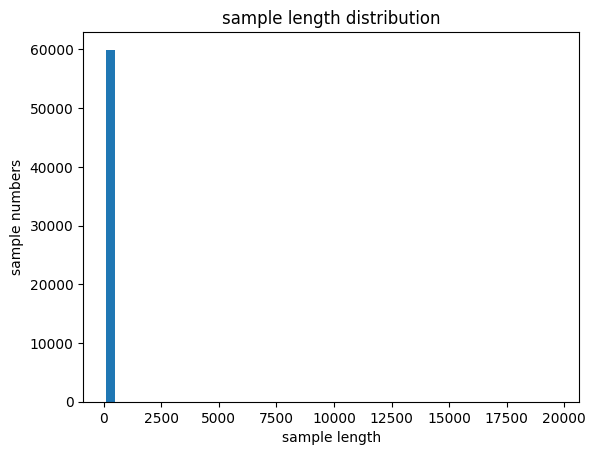

In [11]:
# Plot distribution of sample length
def plot_length(text):
  plt.hist([len(s) for s in text],50)
  plt.xlabel("sample length")
  plt.ylabel("sample numbers")
  plt.title("sample length distribution")
  plt.show()
plot_length(train['text'].tolist())

In [12]:
# That's why the distribution looks like this because most of texts have length < 100
pd.DataFrame([len(s) for s in train["text"]]).value_counts()

86       2046
88       2001
87       1956
89       1901
90       1809
92       1715
91       1681
93       1586
94       1483
95       1478
96       1465
97       1344
98       1248
99       1213
100      1139
101      1132
102      1019
103       988
104       941
106       909
105       895
107       886
108       817
85        815
110       751
109       731
111       718
114       715
112       706
113       662
115       636
116       625
117       624
119       562
118       555
121       505
120       503
123       469
122       469
124       446
127       439
125       424
126       416
129       395
131       390
130       387
128       380
132       361
135       346
134       341
133       339
138       312
137       301
139       288
136       284
140       284
142       279
146       262
141       252
143       243
144       233
148       226
145       224
147       219
150       213
152       202
151       200
149       193
157       193
153       190
155       190
161   

## Text Cleaning



*   Remove special charachters
*   Remove userhandles/mentions
*   Remove Hashtags
*   Remove stopwords/punct
* lower case
* Remove multiple spaces 
* Remove numbers 
* Remove emojis 
* Remove non ascii 
* Remove currency symbols 
* Remove emails/dates 
* Remove html tags/ urls



In [13]:
train

,text,label
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...
59995,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


In [14]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# load text cleaning pkgs
import neattext as nt
import neattext.functions as nfx

In [16]:
# explore its methods/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [17]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [18]:
# noise scan
train['text'].apply(lambda x : nt.TextFrame(x).noise_scan()['text_noise'])

0         8.607891
1         8.659543
2         8.462607
3         8.612785
4         8.634308
           ...    
59995    11.764706
59996     7.058824
59997    12.941176
59998    12.941176
59999     7.058824
Name: text, Length: 60000, dtype: float64

### Train Preprocessing

In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
# Remove userhandles/mentions
train['clean_text']=train['text'].apply(nfx.remove_userhandles)

In [21]:
# Remove Hashtags
train['clean_text']=train['clean_text'].apply(nfx.remove_hashtags)

In [22]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                  Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [23]:
# Remove urls
train['clean_text']=train['clean_text'].apply(nfx.remove_urls)

In [24]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  鈥?""\t0.72\t0\t2\t3\nz...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                  Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [25]:
# Remove html tags 
train['clean_text']=train['clean_text'].apply(nfx.remove_html_tags)

In [26]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  鈥?""\t0.72\t0\t2\t3\nz...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                  Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [27]:
# Remove dates 
train['clean_text']=train['clean_text'].apply(nfx.remove_dates)

In [28]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  鈥?""\t0.72\t0\t2\t3\nz...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                  Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [29]:
# Remove emails 
train['clean_text']=train['clean_text'].apply(nfx.remove_emails)

In [30]:
# Remove currency symbols 
train['clean_text']=train['clean_text'].apply(nfx.remove_currency_symbols)

In [31]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  鈥?""\t0.72\t0\t2\t3\nz...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                   Nigerian Prince Scam took 110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [32]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  鈥?""\t0.72\t0\t2\t3\nz...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: 聙"Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...
                                                        ...                                                 
59995                  Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)
59996                   Nigerian Prince Scam took 110K from Kansas man; 10 years later, he's getting it back
59997                  Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no
59998              

In [33]:
# Remove non ascii 
train['clean_text']=train['clean_text'].apply(nfx.remove_non_ascii)

In [34]:
train['clean_text']

0        A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Se...
1        British Prime Minister   on Nerve Attack on Former Russian Spy: "The government has concluded th...
2        In 1961, Goodyear released a kit that allows PS2s to be brought to heel.  ?""\t0.72\t0\t2\t3\nzw...
3        Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | "As the ...
4        Obama to Nation: "Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Joh...
                                                        ...                                                 
59995                    Finish Sniper Simo Hyh during the invasion of Finland by the USSR (1939, colorized)
59996                   Nigerian Prince Scam took 110K from Kansas man; 10 years later, he's getting it back
59997                    Is It Safe To Smoke Marijuana During Pregnancy? You Be Surprised Of The Answer | no
59998              

In [35]:
# Remove stopwords 
train['clean_text']=train['clean_text'].apply(nfx.remove_stopwords)

In [36]:
train['clean_text']

0        group friends began volunteer homeless shelter neighbors protested. "Seeing person need, natural...
1        British Prime Minister Nerve Attack Russian Spy: "The government concluded highly likely Russia ...
2        1961, Goodyear released kit allows PS2s brought heel. ?"" 0.72 0 2 3 zwillc92 fishing midatlanti...
3        Happy Birthday, Bob Barker! Price Right Host He'd Like Remembered | "As man said, ave pets spaye...
4        Obama Nation: "Innocent Cops Unarmed Young Black Men Dying Magic Johnson? 1.0 0 2 1 Jimbobshawob...
                                                        ...                                                 
59995                                         Finish Sniper Simo Hyh invasion Finland USSR (1939, colorized)
59996                                Nigerian Prince Scam took 110K Kansas man; 10 years later, he's getting
59997                                                     Safe Smoke Marijuana Pregnancy? Surprised Answer |
59998              

In [37]:
# Remove punctuations 
train['clean_text']=train['clean_text'].apply(nfx.remove_puncts)

In [38]:
train['clean_text']

0        group friends began volunteer homeless shelter neighbors protested Seeing person need naturally ...
1        British Prime Minister Nerve Attack Russian Spy: The government concluded highly likely Russia r...
2        1961 Goodyear released kit allows PS2s brought heel  072 0 2 3 zwillc92 fishing midatlantic yest...
3        Happy Birthday Bob Barker Price Right Host Hed Like Remembered | As man said ave pets spayed neu...
4        Obama Nation: Innocent Cops Unarmed Young Black Men Dying Magic Johnson 10 0 2 1 Jimbobshawobodo...
                                                        ...                                                 
59995                                          Finish Sniper Simo Hyh invasion Finland USSR (1939 colorized)
59996                                   Nigerian Prince Scam took 110K Kansas man 10 years later hes getting
59997                                                      Safe Smoke Marijuana Pregnancy Surprised Answer |
59998              

In [39]:
# Remove special charachters
train['clean_text']=train['clean_text'].apply(nfx.remove_special_characters)

In [40]:
# Remove emojis 
train['clean_text']=train['clean_text'].apply(nfx.remove_emojis)

In [41]:
# Remove numbers 
train['clean_text']=train['clean_text'].apply(nfx.remove_numbers)

In [42]:
train['clean_text']

0        group friends began volunteer homeless shelter neighbors protested Seeing person need naturally ...
1        British Prime Minister Nerve Attack Russian Spy The government concluded highly likely Russia re...
2         Goodyear released kit allows PSs brought heel      zwillc fishing midatlantic yesterday twin wa...
3        Happy Birthday Bob Barker Price Right Host Hed Like Remembered  As man said ave pets spayed neut...
4        Obama Nation Innocent Cops Unarmed Young Black Men Dying Magic Johnson     Jimbobshawobodob olym...
                                                        ...                                                 
59995                                                Finish Sniper Simo Hyh invasion Finland USSR  colorized
59996                                        Nigerian Prince Scam took K Kansas man  years later hes getting
59997                                                       Safe Smoke Marijuana Pregnancy Surprised Answer 
59998              

In [43]:
# Remove multiple spaces 
train['clean_text']=train['clean_text'].apply(nfx.remove_multiple_spaces)

In [44]:
train['clean_text']


0        group friends began volunteer homeless shelter neighbors protested Seeing person need naturally ...
1        British Prime Minister Nerve Attack Russian Spy The government concluded highly likely Russia re...
2         Goodyear released kit allows PSs brought heel zwillc fishing midatlantic yesterday twin water s...
3        Happy Birthday Bob Barker Price Right Host Hed Like Remembered As man said ave pets spayed neute...
4        Obama Nation Innocent Cops Unarmed Young Black Men Dying Magic Johnson Jimbobshawobodob olympic ...
                                                        ...                                                 
59995                                                 Finish Sniper Simo Hyh invasion Finland USSR colorized
59996                                         Nigerian Prince Scam took K Kansas man years later hes getting
59997                                                       Safe Smoke Marijuana Pregnancy Surprised Answer 
59998              

In [45]:
# lower case 
train['clean_text']=train['clean_text'].str.lower()

In [46]:
train['clean_text']

0        group friends began volunteer homeless shelter neighbors protested seeing person need naturally ...
1        british prime minister nerve attack russian spy the government concluded highly likely russia re...
2         goodyear released kit allows pss brought heel zwillc fishing midatlantic yesterday twin water s...
3        happy birthday bob barker price right host hed like remembered as man said ave pets spayed neute...
4        obama nation innocent cops unarmed young black men dying magic johnson jimbobshawobodob olympic ...
                                                        ...                                                 
59995                                                 finish sniper simo hyh invasion finland ussr colorized
59996                                         nigerian prince scam took k kansas man years later hes getting
59997                                                       safe smoke marijuana pregnancy surprised answer 
59998              

In [47]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
train['tokens'] = train["clean_text"].apply(word_tokenize)

In [49]:
wnl = WordNetLemmatizer()

In [50]:
lem = train['tokens'].apply(
                    lambda lst:[wnl.lemmatize(word) for word in lst])

In [51]:
train['lemmatize'] = lem

In [52]:
train['lemmatize'].head(1)

0    [group, friend, began, volunteer, homeless, shelter, neighbor, protested, seeing, person, need, ...
Name: lemmatize, dtype: object

In [53]:
train['clean'] = [' '.join(map(str, l)) for l in train['lemmatize']]


In [54]:
train

,text,label,clean_text,tokens,lemmatize,clean
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0,group friends began volunteer homeless shelter neighbors protested seeing person need naturally ...,"[group, friends, began, volunteer, homeless, shelter, neighbors, protested, seeing, person, need...","[group, friend, began, volunteer, homeless, shelter, neighbor, protested, seeing, person, need, ...",group friend began volunteer homeless shelter neighbor protested seeing person need naturally li...
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0,british prime minister nerve attack russian spy the government concluded highly likely russia re...,"[british, prime, minister, nerve, attack, russian, spy, the, government, concluded, highly, like...","[british, prime, minister, nerve, attack, russian, spy, the, government, concluded, highly, like...",british prime minister nerve attack russian spy the government concluded highly likely russia re...
2,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0,goodyear released kit allows pss brought heel zwillc fishing midatlantic yesterday twin water s...,"[goodyear, released, kit, allows, pss, brought, heel, zwillc, fishing, midatlantic, yesterday, t...","[goodyear, released, kit, allows, ps, brought, heel, zwillc, fishing, midatlantic, yesterday, tw...",goodyear released kit allows ps brought heel zwillc fishing midatlantic yesterday twin water spo...
3,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0,happy birthday bob barker price right host hed like remembered as man said ave pets spayed neute...,"[happy, birthday, bob, barker, price, right, host, hed, like, remembered, as, man, said, ave, pe...","[happy, birthday, bob, barker, price, right, host, hed, like, remembered, a, man, said, ave, pet...",happy birthday bob barker price right host hed like remembered a man said ave pet spayed neutere...
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0,obama nation innocent cops unarmed young black men dying magic johnson jimbobshawobodob olympic ...,"[obama, nation, innocent, cops, unarmed, young, black, men, dying, magic, johnson, jimbobshawobo...","[obama, nation, innocent, cop, unarmed, young, black, men, dying, magic, johnson, jimbobshawobod...",obama nation innocent cop unarmed young black men dying magic johnson jimbobshawobodob olympic a...
...,...,...,...,...,...,...
59995,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0,finish sniper simo hyh invasion finland ussr colorized,"[finish, sniper, simo, hyh, invasion, finland, ussr, colorized]","[finish, sniper, simo, hyh, invasion, finland, ussr, colorized]",finish sniper simo hyh invasion finland ussr colorized
59996,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1,nigerian prince scam took k kansas man years later hes getting,"[nigerian, prince, scam, took, k, kansas, man, years, later, hes, getting]","[nigerian, prince, scam, took, k, kansa, man, year, later, he, getting]",nigerian prince scam took k kansa man year later he getting
59997,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0,safe smoke marijuana pregnancy surprised answer,"[safe, smoke, marijuana, pregnancy, surprised, answer]","[safe, smoke, marijuana, pregnancy, surprised, answer]",safe smoke marijuana pregnancy surprised answer
59998,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0,julius caesar realizing room knife bc,"[julius, caesar, realizing, room, knife, bc]","[julius, caesar, realizing, room, knife, bc]",julius caesar realizing room knife bc


In [55]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(train["clean_text"]).split()).value_counts()
word_freq[1:40]

like         2865
man          2514
colorized    2416
trump        2265
people       2140
years        2009
found        1954
poster       1739
war          1607
time         1568
life         1402
old          1366
it           1353
day          1335
world        1311
says         1283
looks        1282
year         1262
circa        1226
psbattle     1162
school       1148
woman        1138
american     1133
president    1124
true         1122
got          1119
photo        1103
house        1094
know         1084
police       1078
news         1051
way          1022
right         974
help          958
left          939
look          932
us            918
the           912
white         910
dtype: int64

In [56]:
# list most uncommon words
word_freq[-20:].reset_index(name="freq")

,index,freq
0,hangouts,1
1,lacierbackground,1
2,lauer,1
3,begotten,1
4,ivinon,1
5,nslf,1
6,coiling,1
7,annotated,1
8,attar,1
9,montenegrin,1


In [57]:
# Distribution of label classes
train["label"].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

2 !! ohh 

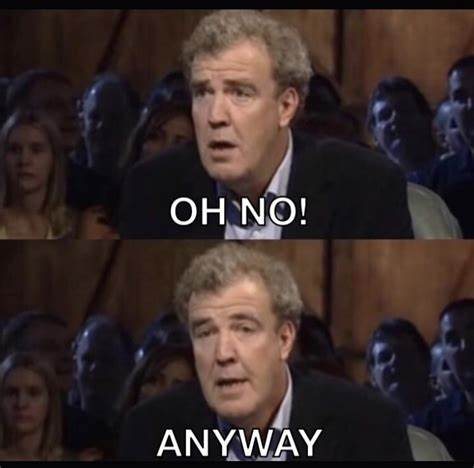

In [58]:
train["label"]=train["label"].replace(2,1)

In [59]:
train["label"].value_counts()

0    32172
1    27828
Name: label, dtype: int64

### Test Preprocessing

In [60]:
# check the data have the null values in testing data
test.isna().sum()

id      0
text    0
dtype: int64

In [61]:
# Remove userhandles/mentions
test['clean_text']=test['text'].apply(nfx.remove_userhandles)

In [62]:
# Remove Hashtags
test['clean_text']=test['clean_text'].apply(nfx.remove_hashtags)

In [63]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [64]:
# Remove urls
test['clean_text']=test['clean_text'].apply(nfx.remove_urls)

In [65]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [66]:
# Remove html tags
test['clean_text']=test['clean_text'].apply(nfx.remove_html_tags)

In [67]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [68]:
# Remove dates
test['clean_text']=test['clean_text'].apply(nfx.remove_dates)

In [69]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [70]:
# Remove emails
test['clean_text']=test['clean_text'].apply(nfx.remove_emails)

In [71]:
# Remove currency symbols
test['clean_text']=test['clean_text'].apply(nfx.remove_currency_symbols)

In [72]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [73]:
# Remove non ascii 
test['clean_text']=test['clean_text'].apply(nfx.remove_non_ascii)

In [74]:
test['clean_text']

0                                                                             stargazer 
1                                                                                   yeah
2                             PD: Phoenix car thief gets instructions from YouTube video
3                         As Trump Accuses Iran, He Has One Problem: His Own Credibility
4                                                           "Believers" - Hezbollah 2011
                                              ...                                       
59146                                                  Bicycle taxi drivers of New Delhi
59147                               Trump blows up GOP's formula for winning House races
59148    Napoleon returns from his exile on the island of Elba. (March 1815), Colourised
59149                                   Deep down he always wanted to be a ballet dancer
59150                          Toddler miraculously survives 6-story fall landing on car
Name: clean_text, Len

In [75]:
# Remove stopwords
test['clean_text']=test['clean_text'].apply(nfx.remove_stopwords)

In [76]:
test['clean_text']

0                                                           stargazer
1                                                                yeah
2               PD: Phoenix car thief gets instructions YouTube video
3                            Trump Accuses Iran, Problem: Credibility
4                                        "Believers" - Hezbollah 2011
                                     ...                             
59146                                  Bicycle taxi drivers New Delhi
59147                   Trump blows GOP's formula winning House races
59148    Napoleon returns exile island Elba. (March 1815), Colourised
59149                                       Deep wanted ballet dancer
59150          Toddler miraculously survives 6-story fall landing car
Name: clean_text, Length: 59151, dtype: object

In [77]:
# Remove punctuations
test['clean_text']=test['clean_text'].apply(nfx.remove_puncts)

In [78]:
test['clean_text']

0                                                         stargazer
1                                                              yeah
2             PD: Phoenix car thief gets instructions YouTube video
3                           Trump Accuses Iran Problem: Credibility
4                                         Believers  Hezbollah 2011
                                    ...                            
59146                                Bicycle taxi drivers New Delhi
59147                  Trump blows GOPs formula winning House races
59148    Napoleon returns exile island Elba (March 1815) Colourised
59149                                     Deep wanted ballet dancer
59150         Toddler miraculously survives 6story fall landing car
Name: clean_text, Length: 59151, dtype: object

In [79]:
# Remove special charachters
test['clean_text']=test['clean_text'].apply(nfx.remove_special_characters)

In [80]:
# Remove emojis
test['clean_text']=test['clean_text'].apply(nfx.remove_emojis)

In [81]:
# Remove numbers
test['clean_text']=test['clean_text'].apply(nfx.remove_numbers)

In [82]:
test['clean_text']

0                                                   stargazer
1                                                        yeah
2        PD Phoenix car thief gets instructions YouTube video
3                      Trump Accuses Iran Problem Credibility
4                                       Believers  Hezbollah 
                                 ...                         
59146                          Bicycle taxi drivers New Delhi
59147            Trump blows GOPs formula winning House races
59148    Napoleon returns exile island Elba March  Colourised
59149                               Deep wanted ballet dancer
59150    Toddler miraculously survives story fall landing car
Name: clean_text, Length: 59151, dtype: object

In [83]:
# Remove multiple spaces
test['clean_text']=test['clean_text'].apply(nfx.remove_multiple_spaces)

In [84]:
test['clean_text']


0                                                   stargazer
1                                                        yeah
2        PD Phoenix car thief gets instructions YouTube video
3                      Trump Accuses Iran Problem Credibility
4                                        Believers Hezbollah 
                                 ...                         
59146                          Bicycle taxi drivers New Delhi
59147            Trump blows GOPs formula winning House races
59148     Napoleon returns exile island Elba March Colourised
59149                               Deep wanted ballet dancer
59150    Toddler miraculously survives story fall landing car
Name: clean_text, Length: 59151, dtype: object

In [85]:
# lower case 
test['clean_text']=test['clean_text'].str.lower()

In [86]:
test['clean_text']

0                                                   stargazer
1                                                        yeah
2        pd phoenix car thief gets instructions youtube video
3                      trump accuses iran problem credibility
4                                        believers hezbollah 
                                 ...                         
59146                          bicycle taxi drivers new delhi
59147            trump blows gops formula winning house races
59148     napoleon returns exile island elba march colourised
59149                               deep wanted ballet dancer
59150    toddler miraculously survives story fall landing car
Name: clean_text, Length: 59151, dtype: object

In [87]:
test

,id,text,clean_text
0,0,stargazer,stargazer
1,1,yeah,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video,pd phoenix car thief gets instructions youtube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility",trump accuses iran problem credibility
4,4,"""Believers"" - Hezbollah 2011",believers hezbollah
...,...,...,...
59146,59146,Bicycle taxi drivers of New Delhi,bicycle taxi drivers new delhi
59147,59147,Trump blows up GOP's formula for winning House races,trump blows gops formula winning house races
59148,59148,"Napoleon returns from his exile on the island of Elba. (March 1815), Colourised",napoleon returns exile island elba march colourised
59149,59149,Deep down he always wanted to be a ballet dancer,deep wanted ballet dancer


In [88]:
test['tokens'] = test["clean_text"].apply(word_tokenize)

In [89]:
test['lemmatize'] = test['tokens'].apply(
                    lambda lst:[wnl.lemmatize(word) for word in lst])

In [90]:
lem_2 = test['tokens'].apply(
                    lambda lst:[wnl.lemmatize(word) for word in lst])

In [91]:
test['lemmatize'] = lem_2

In [92]:
test['clean'] = [' '.join(map(str, l)) for l in test['lemmatize']]


In [93]:
test

,id,text,clean_text,tokens,lemmatize,clean
0,0,stargazer,stargazer,[stargazer],[stargazer],stargazer
1,1,yeah,yeah,[yeah],[yeah],yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video,pd phoenix car thief gets instructions youtube video,"[pd, phoenix, car, thief, gets, instructions, youtube, video]","[pd, phoenix, car, thief, get, instruction, youtube, video]",pd phoenix car thief get instruction youtube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility",trump accuses iran problem credibility,"[trump, accuses, iran, problem, credibility]","[trump, accuses, iran, problem, credibility]",trump accuses iran problem credibility
4,4,"""Believers"" - Hezbollah 2011",believers hezbollah,"[believers, hezbollah]","[believer, hezbollah]",believer hezbollah
...,...,...,...,...,...,...
59146,59146,Bicycle taxi drivers of New Delhi,bicycle taxi drivers new delhi,"[bicycle, taxi, drivers, new, delhi]","[bicycle, taxi, driver, new, delhi]",bicycle taxi driver new delhi
59147,59147,Trump blows up GOP's formula for winning House races,trump blows gops formula winning house races,"[trump, blows, gops, formula, winning, house, races]","[trump, blow, gop, formula, winning, house, race]",trump blow gop formula winning house race
59148,59148,"Napoleon returns from his exile on the island of Elba. (March 1815), Colourised",napoleon returns exile island elba march colourised,"[napoleon, returns, exile, island, elba, march, colourised]","[napoleon, return, exile, island, elba, march, colourised]",napoleon return exile island elba march colourised
59149,59149,Deep down he always wanted to be a ballet dancer,deep wanted ballet dancer,"[deep, wanted, ballet, dancer]","[deep, wanted, ballet, dancer]",deep wanted ballet dancer


## Train , validation split

In [94]:
X = train["clean"]
Y = train["label"]

In [95]:
X_train, X_valid, Y_train,Y_valid = train_test_split(X,Y, random_state=42, test_size=0.2,stratify = Y ,shuffle=True)
print(X_train.shape),
print(X_valid.shape)

(48000,)
(12000,)


In [96]:
from sklearn.model_selection import PredefinedSplit

In [97]:
# with PredefinedSplit you can use the same validation set for hyperparam opt.-1 identify your train data while 0 identify your valid data.
split_indeces = [-1 if x in X_train.index else 0 for x in X.index]
# list to create the predefined splits
cross_splits = PredefinedSplit(test_fold = split_indeces)

In [98]:
# pipeline function for training models with pipeline for every model
def pipeline(clf):
  model_pipeline = Pipeline(steps=[("vectorizer", TfidfVectorizer(norm="l2")),('clf', clf)])
  model_pipeline = model_pipeline.fit(X, Y)
  return model_pipeline

### Hyperparameter Tuning

In [99]:
# grid search function to create instance of grid search, train them and get the best hyperparameters.
def grid_search(pipeline, param_grid, cv):
  grid_search = GridSearchCV(pipeline, param_grid, cv=cv, verbose=1, n_jobs=2,scoring='roc_auc') # create instance of GridSearchCV
  grid_search.fit(X, Y) # grid search training
  print('best score {}'.format(grid_search.best_score_)) # best score of model
  print('best parameters {}'.format(grid_search.best_params_)) # best hyperparameters of model
  return grid_search

In [100]:
# random search function to create instance of random search, train them and get the best hyperparameters
def random_search(pipeline, param_random, cv):
  random_search = RandomizedSearchCV(pipeline, param_random, cv=cv, verbose=1, n_jobs=2,n_iter=5,scoring='roc_auc')
  random_search.fit(X, Y)
  print('best score {}'.format(random_search.best_score_)) #  best score of model
  print('best parameters {}'.format(random_search.best_params_)) #  best hyperparameters of model
  return random_search

In [101]:
# bayesian search function to create instance of random search, train them and get the best hyperparameters
def bayesian_search(pipeline, param_bayesian, cv):
    Bayes_search = BayesSearchCV(pipeline, param_bayesian, cv=cv, verbose=1, n_jobs=2, n_iter=5)
    Bayes_search.fit(X, Y)
    print('best score {}'.format(Bayes_search.best_score_)) # best score of model
    print('best parameters {}'.format(Bayes_search.best_params_)) # best hyperparameters of model
    return Bayes_search

## Models

### Trial (1) XGBoost ⚡


*   Hyperparameter tuning: Bayesian Search with Validation set
*   analysier: word



In [104]:
# To create and train a pipeline for the XGB classifier
XGB_pipeline = pipeline(XGBClassifier(objective='binary:logistic', silent=True, random_state= 42))

[06:27:38] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [105]:
# pipeline prediction
y_pred1 = XGB_pipeline.predict(test)

In [104]:
#  XGBoost hyperparameters
XGB_space={'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30],
    'clf__learning_rate' : [0.005, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3],
    'clf__n_estimators' : [600,1000, 1100, 1500, 2000, 3000, 4000],
    'clf__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'clf__subsample': [0.05, 0.2, 0.3, 0.6, 0.8, 0.9],
    'clf__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

In [105]:
# using bayesian search for XGBoost hyperparameter tuning
bayesian_search_XGB = bayesian_search(XGB_pipeline, XGB_space, cross_splits)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[05:51:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.7708333333333334
best parameters OrderedDict([('clf__colsample_bytree', 0.5), ('clf__learning_rate', 0.05), ('clf__n_estimators', 3000), ('clf__nthread', 5), ('clf__subsample', 0.9), ('vectorizer__analyzer', 'word'), ('vectorizer__max_df', 0.7), ('vectorizer__min_df', 30)])


In [106]:
# optimal hyperparameters 
print('best score {}'.format(bayesian_search_XGB.best_score_))
print('best parameters {}'.format(bayesian_search_XGB.best_params_))

best score 0.7708333333333334
best parameters OrderedDict([('clf__colsample_bytree', 0.5), ('clf__learning_rate', 0.05), ('clf__n_estimators', 3000), ('clf__nthread', 5), ('clf__subsample', 0.9), ('vectorizer__analyzer', 'word'), ('vectorizer__max_df', 0.7), ('vectorizer__min_df', 30)])


In [107]:
# first submission file
submission1 = pd.DataFrame()
submission1['id'] = test.index
submission1['label'] = bayesian_search_XGB.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_XGB_Bayesian.csv'
submission1.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 1 :

* Trying this method the score was bad  ↘ 🏴

Plan for Trial 1.2 :

* change the vectorizer to be on the charachter level with random search

### Trial (1.2) XGBoost ⚡


*   Hyperparameter tuning: Random Search with Validation set
*   analysier: char


In [106]:
#  XGBoost hyperparameters
XGB_space_2={'vectorizer__analyzer': ["char"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30],
    'clf__learning_rate' : [0.005, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3],
    'clf__n_estimators' : [600,1000, 1100, 1500, 2000, 3000, 4000],
    'clf__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'clf__subsample': [0.05, 0.2, 0.3, 0.6, 0.8, 0.9],
    'clf__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

In [107]:
# using random search for XGBoost hyperparameter tuning
random_search_XGB = random_search(XGB_pipeline, XGB_space_2, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[06:33:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.5853576004497307
best parameters {'vectorizer__min_df': 30, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__subsample': 0.3, 'clf__nthread': 9, 'clf__n_estimators': 3000, 'clf__learning_rate': 0.001, 'clf__colsample_bytree': 1.0}


In [108]:
# optimal hyperparameters 
print('best score {}'.format(random_search_XGB.best_score_))
print('best parameters {}'.format(random_search_XGB.best_params_))

best score 0.5853576004497307
best parameters {'vectorizer__min_df': 30, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__subsample': 0.3, 'clf__nthread': 9, 'clf__n_estimators': 3000, 'clf__learning_rate': 0.001, 'clf__colsample_bytree': 1.0}


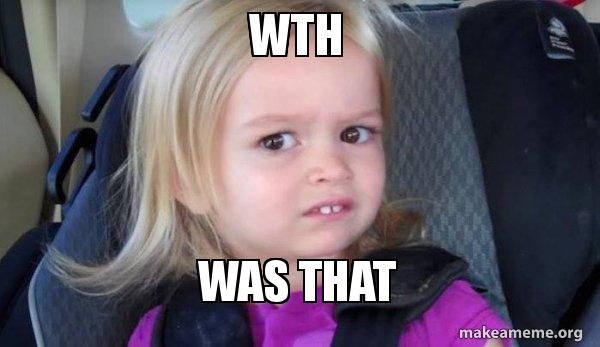

In [109]:
# 1.2 submission file ( of course this file won't be submitted)
submission1_2 = pd.DataFrame()
submission1_2['id'] = test.index
submission1_2['label'] = random_search_XGB.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_XGB_Random.csv'
submission1_2.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 1.2 :

* Trying this method the score died 🙃
Plan for Trial 2 :

* Try another model

### Trial (2) Logistic Regression 📈
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: word






In [110]:
# logistic regression pipeline
Log_pipeline = pipeline(LogisticRegression(random_state = 42))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
# Logistic Regression hyperparameter 
Log_space = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__penalty' : ['l1', 'l2', 'elasticnet'],
    'clf__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'clf__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
    }

In [110]:
# using random search for logistic regression hyperparameter tuning
random_search_Log = random_search(Log_pipeline, Log_space, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

best score 0.7622603698394858
best parameters {'vectorizer__min_df': 50, 'vectorizer__max_df': 0.7, 'vectorizer__analyzer': 'word', 'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__C': 0.05}


In [111]:
# optimal hyperparameters 
print('best score {}'.format(random_search_Log.best_score_))
print('best parameters {}'.format(random_search_Log.best_params_))

best score 0.7622603698394858
best parameters {'vectorizer__min_df': 50, 'vectorizer__max_df': 0.7, 'vectorizer__analyzer': 'word', 'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__C': 0.05}


In [112]:
# second submission file
submission2 = pd.DataFrame()
submission2['id'] = test.index
submission2['label'] = random_search_Log.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_LogisticRegression_Random_Trial2.csv'
submission2.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 2 :

* Trying this method the score got better  ↗ 🥰

plan for trial 2.2

* change the vectorizer to be on the charachter level 

### Trial (2.2) Logistic Regression 📈
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: char


In [112]:
# Logistic Regression hyperparameter 
Log_space_2 = {
    'vectorizer__analyzer': ["char"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__penalty' : ['l1', 'l2', 'elasticnet'],
    'clf__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'clf__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
    }

In [113]:
# using random search for logistic regression hyperparameter tuning
random_search_Log_2 = random_search(Log_pipeline, Log_space_2, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

best score 0.5803479030451659
best parameters {'vectorizer__min_df': 25, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__C': 0.01}


In [114]:
# optimal hyperparameters 
print('best score {}'.format(random_search_Log_2.best_score_))
print('best parameters {}'.format(random_search_Log_2.best_params_))

best score 0.5803479030451659
best parameters {'vectorizer__min_df': 25, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__C': 0.01}


In [120]:
# second submission file
submission2_2 = pd.DataFrame()
submission2_2['id'] = test.index
submission2_2['label'] = random_search_Log_2.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_LogisticRegression_Random_Trial2.csv'
submission2_2.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 2 :

* Trying this method the score got very very bad I think because it doesn't make any sense to use character vectorizer analyzer when you need to analyze NLP text.


Plan for Trial 3 :

* Try another model (Decision Tree)

###  Trial (3) Decision Tree 🌳
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: word

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
# Decision Tree pipeline
DT_pipeline = pipeline(DecisionTreeClassifier(random_state = 42))

In [118]:
# Decision Tree hyperparameters
DT_space = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__criterion' : ['gini', 'entropy', 'log_loss'],
    'clf__max_depth' : np.arange(1,30)
}

In [119]:
# using random search for Decision Tree hyperparameter tuning
random_search_DT = random_search(DT_pipeline, DT_space, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
best score 0.672195599286087
best parameters {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.7, 'vectorizer__analyzer': 'word', 'clf__max_depth': 23, 'clf__criterion': 'entropy'}


In [117]:
# optimal hyperparameters 
print('best score {}'.format(random_search_DT.best_score_))
print('best parameters {}'.format(random_search_DT.best_params_))

best score 0.6856574358887293
best parameters {'vectorizer__min_df': 5, 'vectorizer__max_df': 0.7, 'vectorizer__analyzer': 'word', 'clf__max_depth': 29, 'clf__criterion': 'log_loss'}


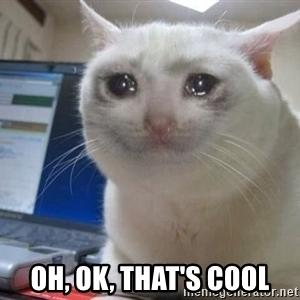

In [118]:
# Third submission file
submission3 = pd.DataFrame()
submission3['id'] = test.index
submission3['label'] = random_search_DT.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_random_search_DT_Trial3.csv'
submission3.to_csv(f_name, index=False)

I won't submit this file 🤡🙃

Thoughts and obsernvations on Trial 3 :

* Trying this method the score died 🧻

Plan for Trial 3.2 :

* change the vectorizer to be on the charachter level 

###  Trial (3.2) Decision Tree 🌳
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: char

In [121]:
# Decision Tree hyperparameters
DT_space_2 = {
    'vectorizer__analyzer': ["char"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__criterion' : ['gini', 'entropy', 'log_loss'],
    'clf__max_depth' : np.arange(1,30)
}

In [123]:
# using random search for Decision Tree hyperparameter tuning
random_search_DT_2 = random_search(DT_pipeline, DT_space_2, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
best score 0.5778907134227069
best parameters {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__max_depth': 6, 'clf__criterion': 'gini'}


In [124]:
# optimal hyperparameters 
print('best score {}'.format(random_search_DT_2.best_score_))
print('best parameters {}'.format(random_search_DT_2.best_params_))

best score 0.5778907134227069
best parameters {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.8, 'vectorizer__analyzer': 'char', 'clf__max_depth': 6, 'clf__criterion': 'gini'}


In [125]:
# 3.2 submission file
submission3_2 = pd.DataFrame()
submission3_2['id'] = test.index
submission3_2['label'] = random_search_DT.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_random_search_DT_Trial3_2.csv'
submission3_2.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 3.2 :

* Trying this method the score got very very bad I think because it doesn't make any sense to use character vectorizer analyzer when you need to analyze NLP text.


Plan for Trial 4 :

* Try another model (SVM)

###  Trial (4) SVM 🎯
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: word

Here I was trying to use SVM and it took a very long time then it crash , I tried it 3 times every time took from 3 to 5 hours on colab and one time it got a good result but I won't count this trial because the tried to run it again and I interupted it and the output now is gone 💔

In [119]:
from sklearn.svm import SVC

In [ ]:
# SVM pipeline
SVM_pipeline = pipeline(SVC(random_state = 42,probability=True))

In [ ]:
SVM_space = {   'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : [0.1, 1.0, 10.0, 50.0, 100.0],
    'clf__gamma' : [1.0, 0.1, 0.01, 0.001, 0.0001],
            }

In [ ]:
# using random search for SVM hyperparameter tuning
random_search_SVM = random_search(SVM_pipeline, SVM_space, cross_splits)

In [ ]:
# optimal hyperparameters 
print('best score {}'.format(random_search_SVM.best_score_))
print('best parameters {}'.format(random_search_SVM.best_params_))

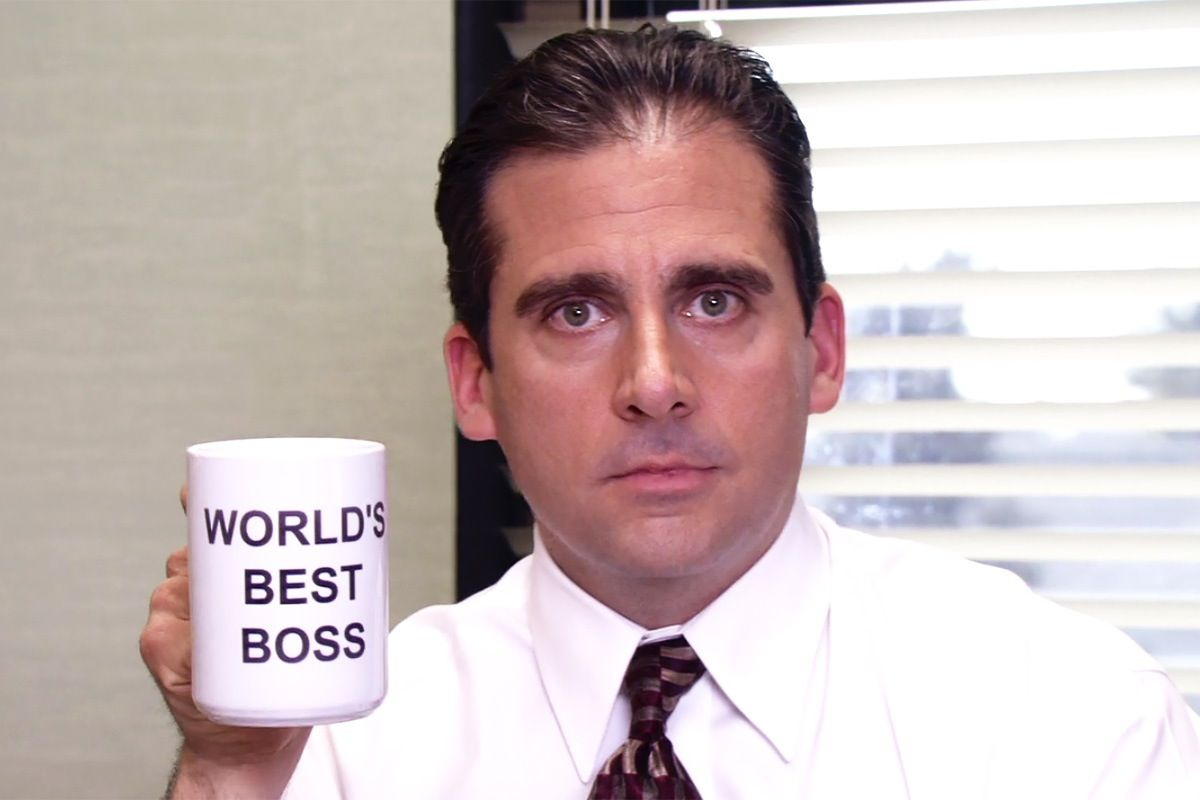

In [ ]:
# Forth submission file
submission4 = pd.DataFrame()
submission4['id'] = test.index
submission4['label'] = random_search_SVM.predict_proba(test.clean)[:,1]
f_name = 'Compition_3_random_search_SVM_Trial4.csv'
submission4.to_csv(f_name, index=False)

# Implementation 2
Another preprocessing 

In [126]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()

from pathlib import Path

# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [127]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [128]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))


def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [129]:
# reading data
data = pd.read_csv("/content/gdrive/MyDrive/competition 3/xy_train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/competition 3/x_test.csv") 

In [131]:
#  train data Preprocessing
data["comment_clean"] = data.loc[data["text"].str.len() > 20, "text"]
data["comment_clean"] = data["comment_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [132]:
# test data Preprocessing

test["comment_clean"] = data.loc[data["text"].str.len() > 20, "text"]
test["comment_clean"] = data["comment_clean"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

### Trial (4) XGBoost ⚡


*   Hyperparameter tuning: Bayesian Search with Validation set
*   analysier: word



In [134]:
# To create and train a pipeline for the XGB classifier
XGB_pipeline_4 = pipeline(XGBClassifier(objective='binary:logistic', silent=True, random_state= 42))

[07:09:17] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [135]:
# pipeline prediction
y_pred4 = XGB_pipeline_4.predict(test)

In [139]:
#  XGBoost hyperparameters
XGB_space_4={'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30],
    'clf__learning_rate' : [0.005, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3],
    'clf__n_estimators' : [600,1000, 1100, 1500, 2000, 3000, 4000],
    'clf__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'clf__subsample': [0.05, 0.2, 0.3, 0.6, 0.8, 0.9],
    'clf__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

In [141]:
# using bayesian search for XGBoost hyperparameter tuning
bayesian_search_XGB_4 = bayesian_search(XGB_pipeline_4, XGB_space_4, cross_splits)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[07:27:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.76525
best parameters OrderedDict([('clf__colsample_bytree', 0.6), ('clf__learning_rate', 0.03), ('clf__n_estimators', 2000), ('clf__nthread', 2), ('clf__subsample', 0.8), ('vectorizer__analyzer', 'word'), ('vectorizer__max_df', 0.8), ('vectorizer__min_df', 15)])


In [142]:
# optimal hyperparameters 
print('best score {}'.format(bayesian_search_XGB_4.best_score_))
print('best parameters {}'.format(bayesian_search_XGB_4.best_params_))

best score 0.76525
best parameters OrderedDict([('clf__colsample_bytree', 0.6), ('clf__learning_rate', 0.03), ('clf__n_estimators', 2000), ('clf__nthread', 2), ('clf__subsample', 0.8), ('vectorizer__analyzer', 'word'), ('vectorizer__max_df', 0.8), ('vectorizer__min_df', 15)])


In [144]:
# fourth submission file
submission4 = pd.DataFrame()
submission4['id'] = test.index
submission4['label'] = bayesian_search_XGB_4.predict_proba(test.comment_clean)[:,1]
f_name = 'Compition_3_XGB_Bayesian_4.csv'
submission4.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 4:

* Trying this method with new preprocessing decreased the score a little bit than the first preprocessing technique

Plan for Trial 5 :

* Try logistic regression model

### Trial (5) Logistic Regression 📈
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: word






In [145]:
# logistic regression pipeline
Log_pipeline_5 = pipeline(LogisticRegression(random_state = 42))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
# Logistic Regression hyperparameter 
Log_space_5 = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__penalty' : ['l1', 'l2', 'elasticnet'],
    'clf__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'clf__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
    }

In [147]:
# using random search for logistic regression hyperparameter tuning
random_search_Log_5 = random_search(Log_pipeline_5, Log_space_5, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, pref

best score 0.8463339465789395
best parameters {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.5, 'vectorizer__analyzer': 'word', 'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__C': 0.06}


In [148]:
# optimal hyperparameters 
print('best score {}'.format(random_search_Log_5.best_score_))
print('best parameters {}'.format(random_search_Log_5.best_params_))

best score 0.8463339465789395
best parameters {'vectorizer__min_df': 10, 'vectorizer__max_df': 0.5, 'vectorizer__analyzer': 'word', 'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__C': 0.06}


In [150]:
# second submission file
submission5 = pd.DataFrame()
submission5['id'] = test.index
submission5['label'] = random_search_Log_5.predict_proba(test.comment_clean)[:,1]
f_name = 'Compition_3_LogisticRegression_Random_Trial5.csv'
submission5.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 5:

* Trying this method the score got much more better than the logistic regression with the first preprocessing technique

plan for trial 6

* try decision tree model 

###  Trial (6) Decision Tree 🌳
*   Hyperparameter tuning: Random Search with Validation set
*   analysier: word

In [151]:
# Decision Tree pipeline
DT_pipeline_6 = pipeline(DecisionTreeClassifier(random_state = 42))

In [152]:
# Decision Tree hyperparameters
DT_space_6 = {
    'vectorizer__analyzer': ["word"], 
    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'vectorizer__min_df': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    
    'clf__criterion' : ['gini', 'entropy', 'log_loss'],
    'clf__max_depth' : np.arange(1,30)
}

In [153]:
# using random search for Decision Tree hyperparameter tuning
random_search_DT_6 = random_search(DT_pipeline_6, DT_space_6, cross_splits)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
best score 0.6848359851896216
best parameters {'vectorizer__min_df': 40, 'vectorizer__max_df': 0.4, 'vectorizer__analyzer': 'word', 'clf__max_depth': 29, 'clf__criterion': 'gini'}


In [154]:
# optimal hyperparameters 
print('best score {}'.format(random_search_DT_6.best_score_))
print('best parameters {}'.format(random_search_DT_6.best_params_))

best score 0.6848359851896216
best parameters {'vectorizer__min_df': 40, 'vectorizer__max_df': 0.4, 'vectorizer__analyzer': 'word', 'clf__max_depth': 29, 'clf__criterion': 'gini'}


In [155]:
# Third submission file
submission6 = pd.DataFrame()
submission6['id'] = test.index
submission6['label'] = random_search_DT.predict_proba(test.comment_clean)[:,1]
f_name = 'Compition_3_random_search_DT_Trial6.csv'
submission6.to_csv(f_name, index=False)

Thoughts and obsernvations on Trial 6:

* Trying this method the score still the same there is no big difference